In [1]:
import matplotlib.pyplot as plt
import cv2

In [2]:
import os

path = "photos/test_images/"

files_list = [f for f in os.listdir(path) if os.path.isfile(f"{path}/{f}")]
print(files_list)

['Alphabet_E_20.jpg', 'Alphabet_F_28.jpg', 'Alphabet_H_20.jpg', 'Alphabet_U_28.jpg']


In [3]:
image = cv2.imread(f"{path}/{files_list[1]}")

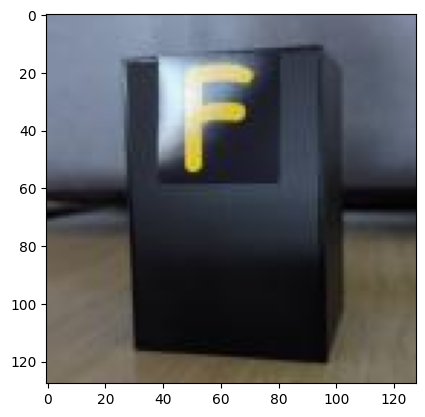

In [4]:
#convert from BGR to RGB
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

#### Scale abs

In [5]:
alpha = 1.95 # Contrast control (1.0-3.0)
beta = 0 # Brightness control (0-100)

scale_abs = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

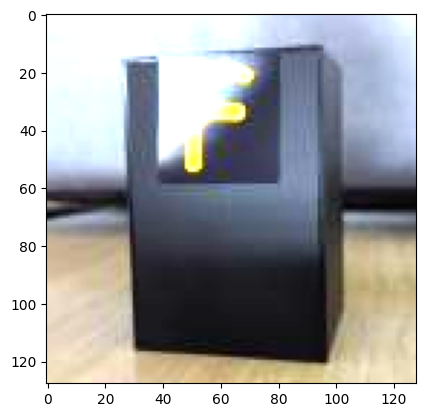

In [6]:
#convert from BGR to RGB
rgb_image = cv2.cvtColor(scale_abs, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

##### Automatic scaling

In [10]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calculate grayscale histogram
hist = cv2.calcHist([gray],[0],None,[256],[0,256])
hist_size = len(hist)

# Calculate cumulative distribution from the histogram
accumulator = []
accumulator.append(float(hist[0]))
for index in range(1, hist_size):
    accumulator.append(accumulator[index -1] + float(hist[index]))

# Locate points to clip
clip_hist_percent = 10
maximum = accumulator[-1]
clip_hist_percent *= (maximum/100.0)
clip_hist_percent /= 2.0

# Locate left cut
minimum_gray = 0
while accumulator[minimum_gray] < clip_hist_percent:
    minimum_gray += 1

# Locate right cut
maximum_gray = hist_size -1
while accumulator[maximum_gray] >= (maximum - clip_hist_percent):
    maximum_gray -= 1

# Calculate alpha and beta values
alpha = 255 / (maximum_gray - minimum_gray)
beta = -minimum_gray * alpha

C:\Users\waiho\AppData\Local\Temp\ipykernel_12064\909672219.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accumulator.append(float(hist[0]))
C:\Users\waiho\AppData\Local\Temp\ipykernel_12064\909672219.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accumulator.append(accumulator[index -1] + float(hist[index]))


In [11]:
scale_abs = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

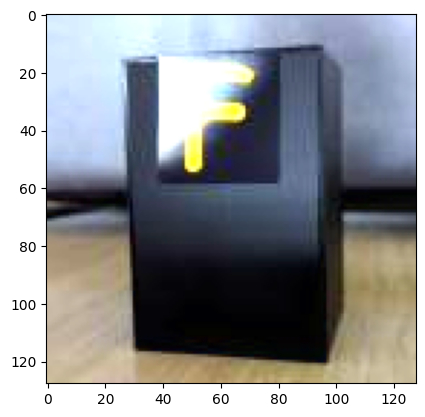

In [12]:
#convert from BGR to RGB
rgb_image = cv2.cvtColor(scale_abs, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)